In [1]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]

X, labels_true = make_blobs(n_samples   = 750, 
                            centers     = centers, 
                            cluster_std = 0.4,
                            random_state= 0)



In [3]:
X[:3]

array([[ 0.84022039,  1.14802236],
       [-1.15474834, -1.2041171 ],
       [ 0.67863613,  0.72418009]])

In [4]:
X = StandardScaler().fit_transform(X)

In [5]:
labels_true

array([0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1,
       1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2,
       1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2,
       2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1,
       1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1,
       1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1,
       1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0,

In [4]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=.3, min_samples=7).fit(X)


In [21]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

core_samples_mask[db.core_sample_indices_] = True
#print(db.core_sample_indices_)
print(core_samples_mask)
labels = db.labels_

# labels for all the rows
print(labels)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True False  True  True False  True  True  True  True  True  True
 False  True False  True  True  True  True  True  T

In [9]:
labels[16]

-1

In [10]:
labels_true[16]

1

In [12]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(n_clusters_)

3


In [9]:
print('Estimated number of clusters: %d'    % n_clusters_)

print("Homogeneity                 : %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness                : %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure                   : %0.3f" % metrics.v_measure_score(labels_true, labels))

print("Adjusted Rand Index         : %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information : %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))

print("Silhouette Coefficient      : %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Homogeneity                 : 0.948
Completeness                : 0.892
V-measure                   : 0.919
Adjusted Rand Index         : 0.954
Adjusted Mutual Information : 0.919
Silhouette Coefficient      : 0.623


{0, 1, 2, -1}
[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0), (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0), (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]


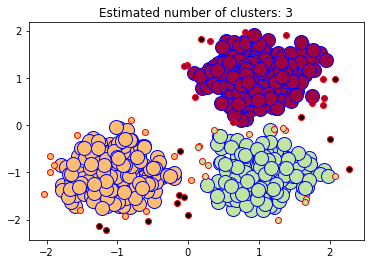

In [20]:
# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
print(unique_labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

#colors = ['r','b','g']
print(colors)

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='b', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='r', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()